In [1]:
import numpy as np
from sklearn.datasets import make_classification

X, y= make_classification(
    n_features= 10,
    n_samples= 1000,
    n_informative= 4,
    n_redundant= 6,
    n_repeated=0,
    n_classes= 2,
    random_state= 42
)

In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.25, random_state= 42)

<h3>Train Logistic regression classifier</h3>

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

model= LogisticRegression()
model.fit(X_train, y_train)

y_pred= model.predict(X_test)
report= classification_report(y_test, y_pred)
print(report)

#this report has threshold value 0.5
#consider this dataset for Pneumonia, so require recall value higher
#for this, try to decrease threshold value

              precision    recall  f1-score   support

           0       0.66      0.69      0.67       122
           1       0.69      0.66      0.68       128

    accuracy                           0.68       250
   macro avg       0.68      0.68      0.68       250
weighted avg       0.68      0.68      0.68       250



In [13]:
probabilities= model.predict_proba(X_test)[:, 1]
y_pred = (probabilities > 0.4).astype(int)

report= classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.75      0.57      0.65       122
           1       0.67      0.82      0.74       128

    accuracy                           0.70       250
   macro avg       0.71      0.70      0.69       250
weighted avg       0.71      0.70      0.70       250



In [15]:
from sklearn.metrics import roc_curve

fpr, tpr, threshold = roc_curve(y_test, probabilities)
fpr[:5], tpr[:5], threshold[:5]

(array([0.        , 0.        , 0.        , 0.00819672, 0.00819672]),
 array([0.       , 0.0078125, 0.265625 , 0.265625 , 0.2890625]),
 array([       inf, 0.97928246, 0.80890214, 0.80840719, 0.80207033]))

In [16]:
tpr

array([0.       , 0.0078125, 0.265625 , 0.265625 , 0.2890625, 0.2890625,
       0.296875 , 0.296875 , 0.34375  , 0.34375  , 0.3515625, 0.3515625,
       0.375    , 0.375    , 0.3984375, 0.3984375, 0.4296875, 0.4296875,
       0.4375   , 0.4375   , 0.4609375, 0.4609375, 0.46875  , 0.46875  ,
       0.4765625, 0.4765625, 0.484375 , 0.484375 , 0.4921875, 0.4921875,
       0.5078125, 0.5078125, 0.515625 , 0.515625 , 0.5390625, 0.5390625,
       0.5546875, 0.5546875, 0.5859375, 0.5859375, 0.625    , 0.625    ,
       0.640625 , 0.640625 , 0.6484375, 0.6484375, 0.65625  , 0.65625  ,
       0.71875  , 0.71875  , 0.75     , 0.75     , 0.7578125, 0.7578125,
       0.765625 , 0.765625 , 0.7734375, 0.7734375, 0.7890625, 0.7890625,
       0.796875 , 0.796875 , 0.84375  , 0.84375  , 0.8515625, 0.8515625,
       0.859375 , 0.859375 , 0.8671875, 0.8671875, 0.875    , 0.875    ,
       0.8828125, 0.8828125, 0.890625 , 0.890625 , 0.90625  , 0.90625  ,
       0.9140625, 0.9140625, 0.921875 , 0.921875 , 

In [19]:
desired_recall= 0.9

closest_idx= np.argmin(abs(tpr- desired_recall)) #gives index of smallest value
closest_idx

np.int64(76)

In [23]:
threshold[closest_idx], fpr[closest_idx]

(np.float64(0.26349585272229664), np.float64(0.7049180327868853))

In [24]:
probabilities= model.predict_proba(X_test)[:, 1]
y_pred = (probabilities > 0.26349585272229664).astype(int)

report= classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.73      0.30      0.42       122
           1       0.57      0.90      0.70       128

    accuracy                           0.60       250
   macro avg       0.65      0.60      0.56       250
weighted avg       0.65      0.60      0.56       250



In [25]:
from sklearn.metrics import auc

area= auc(fpr, tpr)
area

0.764856557377049

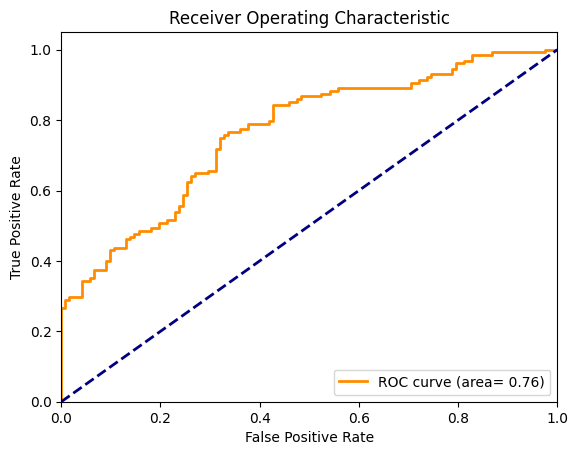

In [29]:
from matplotlib import pyplot as plt

plt.figure()
plt.plot(fpr, tpr, color="darkorange", lw= 2, label="ROC curve (area= %0.2f)" % area)
plt.plot([0, 1], [0, 1], color="navy", lw= 2,  linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc= "lower right")
plt.show()

<h3>XGBoost Classifier</h3>

In [32]:
from xgboost import XGBClassifier

model= XGBClassifier()
model.fit(X_train, y_train)

y_pred= model.predict(X_test)
report= classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.89      0.93      0.91       122
           1       0.93      0.89      0.91       128

    accuracy                           0.91       250
   macro avg       0.91      0.91      0.91       250
weighted avg       0.91      0.91      0.91       250



In [33]:
prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, threshold= roc_curve(y_test, prob)
area= auc(fpr, tpr)
area

0.946016905737705

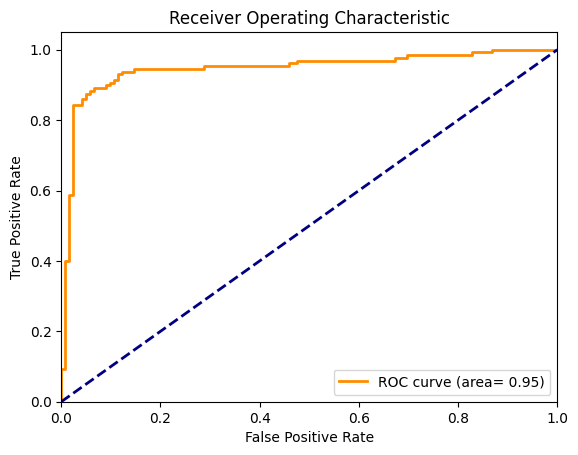

In [34]:
plt.figure()
plt.plot(fpr, tpr, color="darkorange", lw= 2, label="ROC curve (area= %0.2f)" % area)
plt.plot([0, 1], [0, 1], color="navy", lw= 2,  linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc= "lower right")
plt.show()